# Introduction to Pytorch

PyTorch is a popular deep learning framework that was introduced around one year ago. It has a slightly lower-level API than Keras, but is much easier to use than TensorFlow when it comes to defining custom model. It is very popular among researchers and kagglers - a little less in the industry (yet).

http://pytorch.org/

## Principles

PyTorch essentially provides the user with two main utilies:

- It allows to perform Tensor/vector computation on the GPU with an API similar (but not compatible) to Numpy.

- It records all computation to be able to backpropagate through them. That is, provided a sequence of operations that starts from a tensor $\theta$ to define a scalar $g(\theta)$, it is able to compute 
$\nabla_\theta g(\theta)$ exactly, with only one function call.

Typically, $\theta$ will be a parameter of a neural network and $g$ a loss function such as $\ell(f_{\theta}(x), y)$ for supervised learning. 

The essential difference with TensorFlow lies in the way $g$ is defined: in PyTorch, every node in the computation graph is done while executing the forward pass, from within the Python interpreter: any Numpy code can be ported to PyTorch easily, and all flow control operation (e.g. loops, if/else, etc.) can be kept untouched. In contrast, TensorFlow requires the user to define a graph more declaratively. This graph is then used internally (i.e. outside the Python interpreter), to compute both the the predictions, the loss value and its derivatives.

PyTorch takes care of recording everything it needs to do the backpropagation, *on the fly*.

Note that recent versions of TensorFlow (1.5 and later) now come with the [eager mode](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/eager/python/g3doc/guide.md) to make TensorFlow use the define-by-run semantics of PyTorch (and Chainer). However this mode is quite new and still experimental.

## Installation

We will use the CPU only version for the moment. We will assume that you have a working Anaconda environment.

### On Linux:

`conda install pytorch-cpu torchvision -c pytorch`

If you prefer to use pip, see: http://pytorch.org.

### On OSX

`conda install pytorch torchvision -c pytorch`

If you prefer to use pip, see: http://pytorch.org.

### On Windows

`conda install -c peterjc123 pytorch-cpu`

Refer to https://github.com/peterjc123/pytorch-scripts for Windows installation problems.

## A first example

We will define a vector $x \in \mathbb{R}^n$ and computes its norms using PyTorch. For this, we will define our first `Tensor` -- the Tensor object is the central element of PyTorch.

Let us fill this vector with random values

In [1]:
import torch

torch.manual_seed(42)

n = 3
x = torch.FloatTensor(n).uniform_()

`x` is a tensor, which can be manipulated roughly as a Numpy array:

In [2]:
x


 0.8823
 0.9150
 0.3829
[torch.FloatTensor of size 3]

Let's do a small API tour

In [3]:
x.shape, x.shape[0]

(torch.Size([3]), 3)

In [4]:
x * 10


 8.8227
 9.1500
 3.8286
[torch.FloatTensor of size 3]

We can go back and forth from numpy to PyTorch tensors:

In [5]:
x_np = x.numpy()

In [6]:
import numpy as np

A = torch.from_numpy(np.ones((n, n)))

A


 1  1  1
 1  1  1
 1  1  1
[torch.DoubleTensor of size 3x3]

Note that all tensors are typed and that you can only do operations with tensors of the same type:

In [7]:
torch.matmul(A, x)

TypeError: torch.mv received an invalid combination of arguments - got ([32;1mtorch.DoubleTensor[0m, [31;1mtorch.FloatTensor[0m), but expected (torch.DoubleTensor source, torch.DoubleTensor vec)

In [8]:
torch.matmul(A.float(), x)


 2.1801
 2.1801
 2.1801
[torch.FloatTensor of size 3]

In [9]:
A.float() @ x


 2.1801
 2.1801
 2.1801
[torch.FloatTensor of size 3]

Let us now define a norm function that returns the norm of $x$

In [10]:
def f(x):
    return torch.sqrt(torch.sum(x ** 2, dim=0))

In [11]:
f(x)


 1.3275
[torch.FloatTensor of size 1]

We are now interested in computing $\nabla_x f(x) = \frac{x}{|| x ||_2}$. 


**Exercise**:

- Show that if $f(x) = || x ||_2$ then $\nabla_x f(x) = \frac{x}{|| x ||_2}$.


Assume we are too lazy to derive the analytical form of the gradient manually. Instead we will use the `autograd` facilities of PyTorch: central to it is the Variable class:

In [12]:
from torch.autograd import Variable

Variables are typically initialized by wrapping some tensor value:

In [13]:
x = Variable(x, requires_grad=True)

In [14]:
x

Variable containing:
 0.8823
 0.9150
 0.3829
[torch.FloatTensor of size 3]

In [15]:
x.data


 0.8823
 0.9150
 0.3829
[torch.FloatTensor of size 3]

Let us now compute the norm of f. All PyTorch functions can handle both Variables and Tensors.

In [16]:
norm = f(x)

In [17]:
norm

Variable containing:
 1.3275
[torch.FloatTensor of size 1]

We can compute the gradient of this scalar variable with respect to all the variables that were used to compute its value.

The following `.backward()` call will assign `.grad` attributes to all Variables requires in $f$ computation for which a gradient is required.

In [18]:
norm.backward()

The gradient $\nabla_x f(x)$ can be found in `x.grad`, which is also a Variable

In [19]:
x.grad

Variable containing:
 0.6646
 0.6893
 0.2884
[torch.FloatTensor of size 3]

Let us compare it to the result of the evaluation of the analytical expression of the derivative of f(x) given x:  $\nabla_x f(x) = \frac{x}{|| x ||_2}$

In [20]:
expected_grad = x / f(x)

In [21]:
expected_grad

Variable containing:
 0.6646
 0.6893
 0.2884
[torch.FloatTensor of size 3]

It works ! You now know everything you need to know to use PyTorch. Note that, similar to Keras, PyTorch comes with a number of predefined functions that are useful in network definition. Check out http://pytorch.org/docs/ and tutorials for an overview of the tools you can use.

**Exercises**

- Write a function the pytorch code for function `g` that computes the cosine similarity of two variable vectors with float entries $\mathbf{x}$ and $\mathbf{y}$:

$$g(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x}^T \mathbf{y}}{|| \mathbf{x} ||_2 || \mathbf{y} ||_2 }$$

- Use `torch.autograd` to compute the derivatives with respect to $\mathbf{x} \in \mathbb{R}^3$ and $\mathbf{y} \in \mathbb{R}^3$ for some values of your choice;

- Compute $\nabla_x g(x, y)$ and $\nabla_y g(x, y)$ for some choice of $\mathbf{x} = \alpha \cdot \mathbf{y}$ with any $\alpha \in \mathbb{R}$. Check that you can get the expected result with Pytorch.

In [22]:
def g(x, y):
    # TODO: fix the following code to implement the cosine
    # similarity function instead.
    return torch.sum(x) + torch.sum(y)


x = Variable(torch.FloatTensor([0, 1, 2]), requires_grad=True)
y = Variable(torch.FloatTensor([3, 0.9, 2.2]), requires_grad=True)

cosine = g(x, y)
cosine

Variable containing:
 9.1000
[torch.FloatTensor of size 1]

In [23]:
# %load solutions/cosine_autograd.py

In [24]:
# %load solutions/cosine_autograd_colinear.py

Let's reinitialize our two variables to non colinear values:

In [25]:
x = Variable(torch.FloatTensor([0, 1, 2]), requires_grad=True)
y = Variable(torch.FloatTensor([3, 0.9, 2.2]), requires_grad=True)

Execute the following cells several times (use `ctrl-enter`):

In [26]:
cosine = g(x, y)
print(cosine)
cosine.backward()
x.data.add_(0.5 * x.grad.data)
y.data.add_(0.5 * y.grad.data)
x.grad.data.zero_()
y.grad.data.zero_()
print("x", x)
print("y", y)
print(x / y)

Variable containing:
 9.1000
[torch.FloatTensor of size 1]

x Variable containing:
 0.5000
 1.5000
 2.5000
[torch.FloatTensor of size 3]

y Variable containing:
 3.5000
 1.4000
 2.7000
[torch.FloatTensor of size 3]

Variable containing:
 0.1429
 1.0714
 0.9259
[torch.FloatTensor of size 3]



What do you observe?

## Comparing gradient descent methods

In this notebook, we will use PyTorch to compare the different gradient methods and a toy 2D examples: we will try to find the minimum of the difference of two Gaussians. PyTorch provides a convenient wrapper named `nn.Module` to define parametrized functions, that we will use along this tutorial.

In [27]:
import torch.nn as nn
from torch.nn import Parameter

class Norm(nn.Module):

    def __init__(self, p=2.):
        super(Norm, self).__init__()
        self.p = Parameter(torch.FloatTensor([p]))
        
    def forward(self, x):
        p_sum = torch.sum(torch.pow(x, self.p), dim=0)
        return torch.pow(p_sum, 1 / self.p)

In [28]:
torch.manual_seed(42)

x = torch.FloatTensor(n).uniform_()
x = Variable(x)
norm = Norm(p=3.)
v = norm(x)
v.backward()

We can access $\nabla_p(x \to || x ||_p)$ in `norm.p.grad`

In [29]:
norm.p.grad

Variable containing:
-0.1051
[torch.FloatTensor of size 1]

We now define a Gaussian operator, along with a generic Gaussian combination. We will not consider the gradient w.r.t the parameters of these modules, hence we specify `requires_grad=False`

In [30]:
class Gaussian(nn.Module):

    def __init__(self, precision, mean):
        super(Gaussian, self).__init__()

        assert precision.shape == (2, 2)
        assert mean.shape == (2,)

        self.precision = Parameter(precision, requires_grad=False)
        self.mean = Parameter(mean, requires_grad=False)

    def forward(self, x):
        """Compute the (unormalized) likelihood of x given a Gaussian.
        
        x can be a 2D-vector or a batch of 2D-vectors.
        """
        xc = x - self.mean
        if len(xc.shape) == 1:
            # Reshape xc to work as a mini-batch.
            xc = xc.view(1, -1)
        value = torch.exp(-.5 * (torch.sum((xc @ self.precision) * xc, dim=1)))
        return value


class GaussianCombination(nn.Module):

    def __init__(self, precisions, means, weights):
        super(GaussianCombination, self).__init__()
        assert len(precisions) == len(means) == len(weights)
        self.gaussians = nn.ModuleList()
        for precision, mean in zip(precisions, means):
            self.gaussians.append(Gaussian(precision, mean))
        self.weights = weights

    def forward(self, x):
        return sum(w * g(x) for g, w in zip(self.gaussians, self.weights))

We now define $f(x) = \exp(-(x- m_1)^T P_1 (x - m_1)) - \exp(-(x- m_2)^T P_2 (x - m_2))$

In [31]:
p1 = torch.FloatTensor([[1, 0], [0, 4]])
m1 = torch.FloatTensor([0, 1])
w1 = 1
p2 = torch.FloatTensor([[1, -2], [-2, 10]])
m2 = torch.FloatTensor([0, -2])
w2 = - 1

f = GaussianCombination([p1, p2], [m1, m2], [w1, w2])

We define a plotting function to visualize $f$. Note the small boilerplate to interface PyTorch with Numpy

In [32]:
import matplotlib.pyplot as plt


def plot_function(f, ax):
    x_max, y_max, x_min, y_min = 3, 3, -3, -3
    x = np.linspace(x_min, x_max, 100, dtype=np.float32)
    y = np.linspace(y_min, y_max, 100, dtype=np.float32)
    X, Y = np.meshgrid(x, y)
    samples = np.concatenate((X[:, :, None], Y[:, :, None]), axis=2)
    samples = samples.reshape(-1, 2)
    samples = Variable(torch.from_numpy(samples), requires_grad=False)
    Z = f(samples).data.numpy()
    Z = Z.reshape(100, 100)
    CS = ax.contour(X, Y, Z)
    ax.clabel(CS, inline=1, fontsize=10)

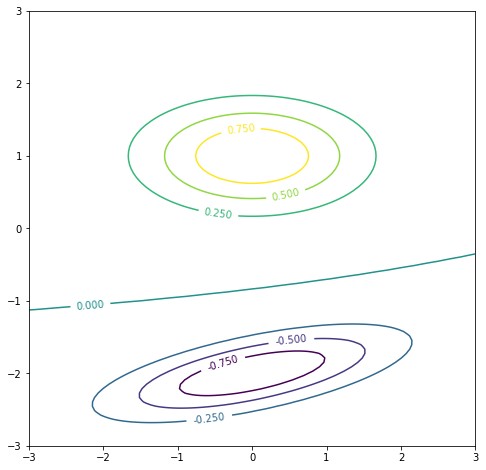

In [33]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_function(f, ax)

We will now try to minimize $f$ using gradient descent, with optional flavors. For this, we define a minimize function that performs gradient descent, along with a helper class `GradientDescent` that will perform the updates given the gradient

In [34]:
class GradientDescent:
    
    def __init__(self, params, lr=0.1):
        self.params = params
        self.lr = lr

    def step(self):
        for param in self.params:
            param.data = param.data - self.lr * param.grad.data

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.data.zero_()

In [46]:
def minimize(f, optimizer, max_iter=500, verbose=False):
    if hasattr(optimizer, 'params'):
        [iterate] = optimizer.params
    else:
        # For pytorch optimizers.
        [iterate] = optimizer.param_groups[0]['params']
    iterate_record = []

    for i in range(max_iter):
        # iterate.grad may be non zero. We zero it first:
        optimizer.zero_grad()
        value = f(iterate)
        
        # Compute the gradient of f with respect to the parameters:
        value.backward()
        # iterate.grad now holds $\nabla_x f(x)$
        if float(torch.sum(iterate.grad ** 2)) < 1e-6:
            if verbose:
                print("Converged!")
            break
        
        # We store the trajectory of the iterates
        iterate_record.append(iterate.data.clone()[None, :])
        if verbose:
            print('Iteration %i: f(x) = %e, x = [%e, %e]'
                  % (i, value, iterate[0], iterate[1]))

        # Perform the parameter update step using the gradient
        # values:
        optimizer.step()
    iterate_record = torch.cat(iterate_record, dim=0)
    return iterate_record

Run the minimization algorithm and plot it

In [47]:
# The extra dimension marked with `None` is used to make it 
# possible
init = torch.FloatTensor([0.8, 0.8])
optimizer = GradientDescent([Variable(init.clone(), requires_grad=True)], lr=0.1)
iterate_rec = minimize(f, optimizer, verbose=True)

Iteration 0: f(x) = 6.703200e-01, x = [8.000000e-01, 8.000000e-01]
Iteration 1: f(x) = 6.107973e-01, x = [8.536256e-01, 7.463744e-01]
Iteration 2: f(x) = 5.436768e-01, x = [9.057648e-01, 6.844089e-01]
Iteration 3: f(x) = 4.717643e-01, x = [9.550092e-01, 6.157771e-01]
Iteration 4: f(x) = 3.996109e-01, x = [1.000063e+00, 5.432720e-01]
Iteration 5: f(x) = 3.321852e-01, x = [1.040027e+00, 4.702666e-01]
Iteration 6: f(x) = 2.731740e-01, x = [1.074575e+00, 3.998788e-01]
Iteration 7: f(x) = 2.241067e-01, x = [1.103929e+00, 3.343038e-01]
Iteration 8: f(x) = 1.846537e-01, x = [1.128669e+00, 2.746290e-01]
Iteration 9: f(x) = 1.534766e-01, x = [1.149510e+00, 2.210520e-01]
Iteration 10: f(x) = 1.289651e-01, x = [1.167153e+00, 1.732319e-01]
Iteration 11: f(x) = 1.096372e-01, x = [1.182205e+00, 1.305822e-01]
Iteration 12: f(x) = 9.427955e-02, x = [1.195166e+00, 9.245397e-02]
Iteration 13: f(x) = 8.195306e-02, x = [1.206434e+00, 5.822871e-02]
Iteration 14: f(x) = 7.194943e-02, x = [1.216321e+00, 2.73

In [48]:
def plot_trace(iterate_rec, ax, label='', tags=True):
    iterate_rec = iterate_rec.numpy()
    n_steps = len(iterate_rec)
    line = ax.plot(iterate_rec[:, 0], iterate_rec[:, 1], linestyle=':',
                   marker='o', markersize=2,
                   label=label + " (%d steps)" % n_steps)
    color = plt.getp(line[0], 'color')
    bbox_props = dict(boxstyle="square,pad=0.3", ec=color, fc='white',
                      lw=1)
    if tags:
        for i in range(0, len(iterate_rec), 10):
            ax.annotate(i, xy=(iterate_rec[i, 0], iterate_rec[i, 1]),
                        xycoords='data',
                        xytext=(5 + np.random.uniform(-2, 2),
                                5 + np.random.uniform(-2, 2)),
                        textcoords='offset points',
                        bbox=bbox_props)

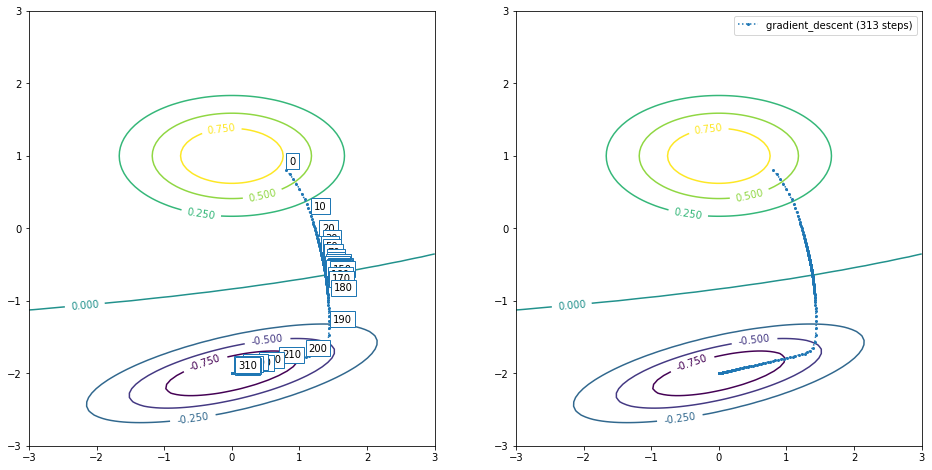

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plot_function(f, ax1)
plot_function(f, ax2)
plot_trace(iterate_rec, ax1, label='gradient_descent')
plot_trace(iterate_rec, ax2, label='gradient_descent', tags=False)
plt.legend();

## Exercices

- Try to move the initialization point to the other side of the yellow mountain, for instance at position `[0.8, 1.2]`. What do you observe? How to do you explain this?
- Implement the step method of `MomemtumGradientDescent`.
- Check that it behaves as `GradientDescent` for `momemtum=0`
- Can you find a value of `momentum` that makes it converge faster than gradient descent on for this objective function?
- Try to use [torch.optim.Adam](http://pytorch.org/docs/master/optim.html#torch.optim.Adam) in the minimization loop.
- Compare the three trajectories.

In [51]:
class MomentumGradientDescent(GradientDescent):

    def __init__(self, params, lr=0.1, momentum=.9):
        super(MomentumGradientDescent, self).__init__(params, lr)
        self.momentum = momentum
        self.velocities = [param.data.new(param.shape).zero_()
                           for param in params]

    def step(self):
        # TODO: implement me!
        pass

In [52]:
# %load solutions/momentum_optimizer.py
class MomentumGradientDescent(GradientDescent):

    def __init__(self, params, lr=0.1, momentum=.9):
        super(MomentumGradientDescent, self).__init__(params, lr)
        self.momentum = momentum
        self.velocities = [param.data.new(param.shape).zero_()
                           for param in params]

    def step(self):
        for i, (param, velocity) in enumerate(zip(self.params,
                                                  self.velocities)):
            velocity = (self.momentum * velocity +
                        (1 - self.momentum) * param.grad.data)
            param.data = param.data - self.lr * velocity
            self.velocities[i] = velocity


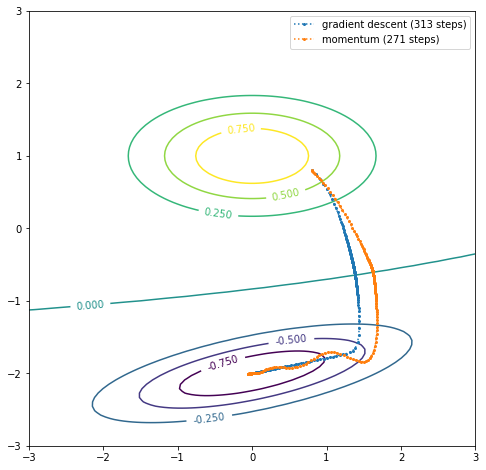

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))
plot_function(f, ax)

lr = 0.1
init = torch.FloatTensor([0.8, 0.8])

optimizer = GradientDescent([Variable(init.clone(), requires_grad=True)], lr=lr)
iterate_rec = minimize(f, optimizer)
plot_trace(iterate_rec, ax, label='gradient descent', tags=False)

optimizer = MomentumGradientDescent([Variable(init.clone(), requires_grad=True)],
                                    lr=lr, momentum=0.9)
iterate_rec = minimize(f, optimizer)
plot_trace(iterate_rec, ax, label='momentum', tags=False)

# TODO: plot torch.optim.Adam

ax.legend();

What do you observe ? Try changing the momentum and the initialization to compare optimization traces.